In [74]:
from os import listdir
import json
#imports
import pickle
from bs4 import BeautifulSoup
import json
import re
import unidecode

#Remove stopwords
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /home/sergio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sergio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
bow = pickle.load(open("bow.pkl", "rb"))

model = pickle.load(open("model.pkl", "rb"))

In [76]:
output = {}

In [77]:
crawler = 'HeuristicCrawler'

In [78]:
for direc in listdir(crawler+'/'):
    print(direc)
    if ('robot' not in direc) and ('mercado' not in direc):
        output[direc] = []
        for d in listdir(crawler+'/'+direc):
            f = open(crawler+'/'+direc+'/'+d)
            
            data = json.load(f)
            html = data['content']
            #parse html
            soup = BeautifulSoup(html)
            text = []
            for script in soup(["script", "style"]):
                    script.extract()    # rip it out
            text.append(soup.get_text())


            #change characters
            text = [unidecode.unidecode(s) for s in text]

            #Substitute point and go to lower case
            text = [re.sub('[^A-Za-z]', ' ', s) for s in text]
            text = [s.lower() for s in text]

            #tokenize
            data = []
            for s in text:
                tokenized_text = word_tokenize(s)
                for word in tokenized_text:
                    if word in stopwords.words('portuguese'):
                        tokenized_text.remove(word)

                s_text = " ".join(tokenized_text)
                data.append(s_text)

            #apply bag of words
            X = bow.transform(data).toarray()

            #predict
            output[direc].append(model.predict(X))

mercadolivre
estantevirtual
submarino
saraiva
livrariadavila
livrariascuritiba
travessa
robots
livrariacultura
amazon
magazineluiza


In [32]:
import pandas as pd

In [119]:
pd.DataFrame(output).to_csv('stats_heuristic.csv')

In [120]:
heuristic = output

In [35]:
bfs = output

In [45]:
output

{'mercadolivre': [array(['negative'], dtype=object)],
 'estantevirtual': [array(['positive'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['positive'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  array(['negative'], dtype=object),
  a

In [151]:
df_bfs = pd.read_csv('stats_bfs.csv', index_col=False)

In [126]:
df = pd.read_csv('stats_heuristic.csv', index_col=False)

In [127]:
df = df.drop(['Unnamed: 0'], axis=1)

<AxesSubplot:title={'center':'Harvest Ratio - Heuristic'}>

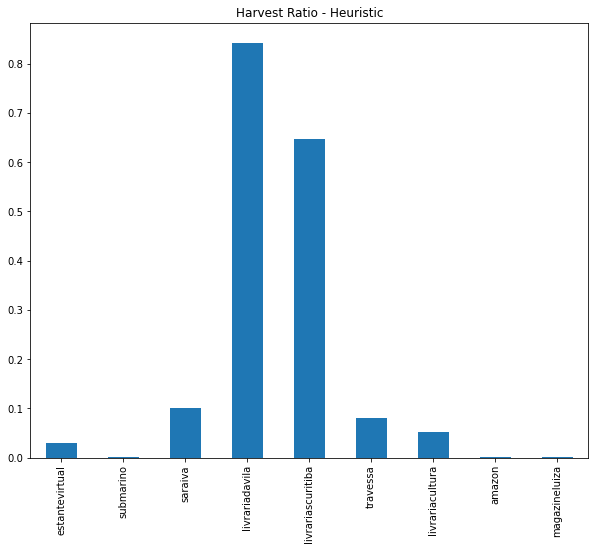

In [129]:
((df.apply(pd.value_counts).T["['positive']"])/len(df)).plot(kind='bar', figsize=(10, 8), title='Harvest Ratio - Heuristic')

In [150]:
hv_heuristic = df.apply(pd.value_counts).T.sum()["['positive']"]/(len(df)*len(df.columns))

In [152]:
hv_bfs = df_bfs.apply(pd.value_counts).T.sum()["['positive']"]/(len(df_bfs)*len(df_bfs.columns))

Text(0.5, 1.0, 'Comparação Harvest Ratio')

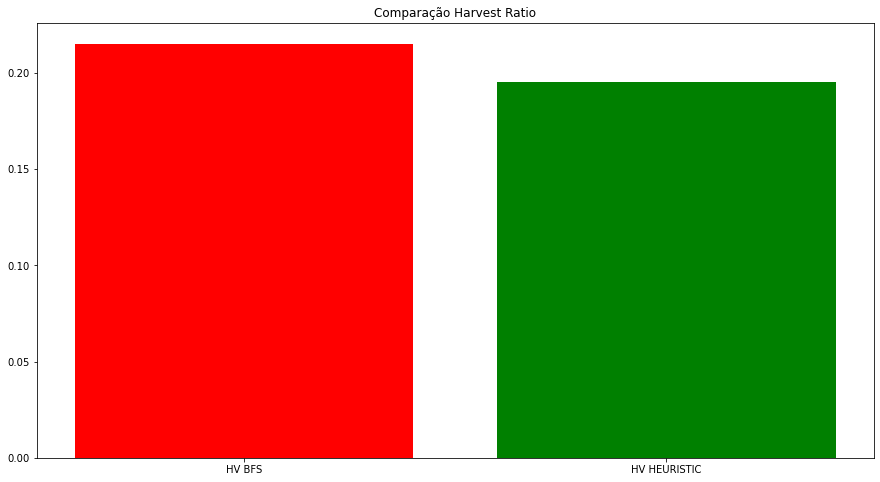

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.bar(['HV BFS', 'HV HEURISTIC'], [hv_bfs, hv_heuristic], color = list('rg'))
plt.title('Comparação Harvest Ratio')